In [1]:
import os, platform, sys, h5py
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox, FloatRangeSlider

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis
from TrapAnalysis import artificial_anneal as anneal
from mpltools import color

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


In [10]:
save = False

In [3]:
datapath = r"/Volumes/slab/_Data/170216 - M018V4 Breton cooldown/data/170216/141438_nwa_scan_highres/nwa_scan_highres.h5"

temperature = list()

with h5py.File(datapath, "r") as f:
    temperature = f["temperature"][()]
    fpoints = f["fpoints"][()][0]
    mags = f["mags"][()][0]

===========  ======================  =====================
Parameter            Value                    Std
===========  ======================  =====================
Amplitude    1.0588707913338722e-08  1.176186966796044e-11
f0             5302195053.185481      195.97635262985978
HWHM           176454.32033079895      277.3426631482288
===========  ======================  =====================
QL = 15024


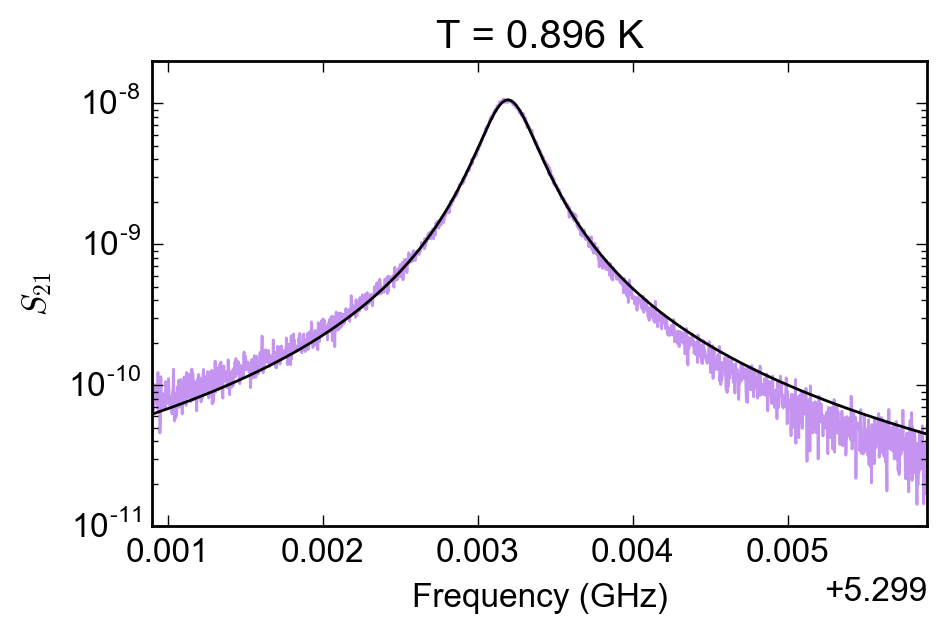

In [7]:
fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(fpoints/1E9, common.dBm_to_W(mags), color='blueviolet', alpha=0.5)
plt.yscale('log')

fr, ferr = kfit.fit_lor(fpoints, common.dBm_to_W(mags), no_offset=True)
plt.plot(fpoints/1E9, kfit.lorfunc(fpoints, *fr), '-k')
plt.ylabel("$S_{21}$")
plt.xlabel("Frequency (GHz)")
plt.xlim(np.min(fpoints/1E9), np.max(fpoints/1e9))
plt.ylim(1E-11, 2E-8)
plt.title("T = %.3f K"%temperature)

print("QL = %d"%(fr[-2]/(2*fr[-1])))

if save: 
    common.save_figure(fig, save_path=os.path.split(datapath)[0])

In [8]:
datapath = r"/Volumes/slab/_Data/170216 - M018V4 Breton cooldown/data/170216/133248_nwa_scan_powersweep/nwa_scan_powersweep.h5"

temperature = list()

with h5py.File(datapath, "r") as f:
    temperature = f["temperature"][()]
    power = f["powers"][()]
    fpoints = f["fpoints"][()]
    mags = f["mags"][()]

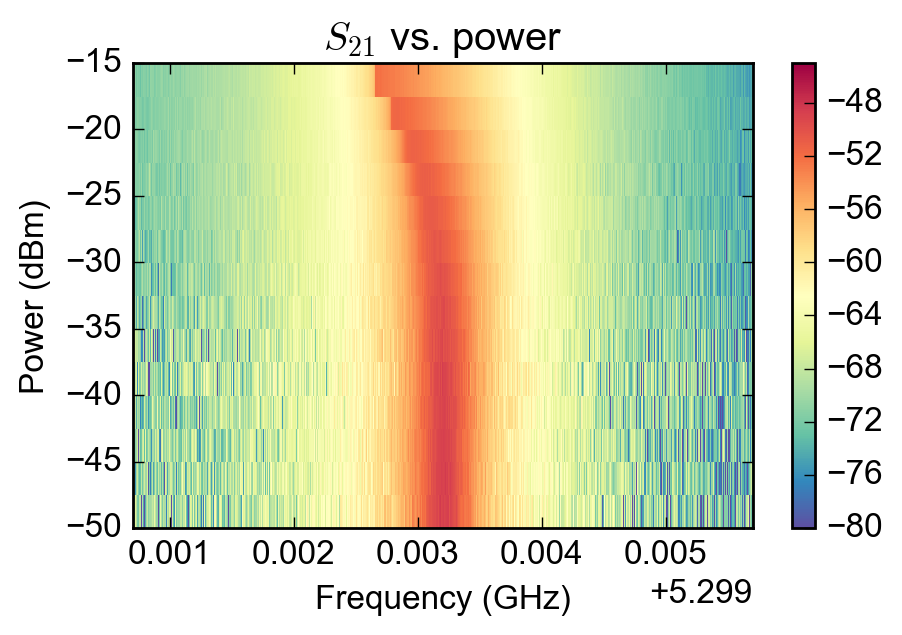

In [9]:
fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.pcolormesh(fpoints/1E9, power, mags, cmap=plt.cm.Spectral_r, vmin=-80, vmax=-45)
plt.colorbar()
plt.xlabel("Frequency (GHz)")
plt.xlim(np.min(fpoints/1E9), np.max(fpoints/1e9))
plt.title("$S_{21}$ vs. power")
plt.ylabel("Power (dBm)")

if save: 
    common.save_figure(fig, save_path=os.path.split(datapath)[0])

In [ ]:
datapath = r"/Volumes/slab/_Data/170216 - M018V4 Breton cooldown/data/170216/135028_nwa_scan_4g_10g/nwa_scan_4g_10g.h5"

with h5py.File(datapath, "r") as f:
    temperature = f["temperature"][()]
    fpoints = f["fpoints"][()][0]
    mags = f["mags"][()][0]
    
datapath = r"/Volumes/slab/_Data/170216 - M018V4 Breton cooldown/data/170216/135212_nwa_scan_10g_20g/nwa_scan_10g_20g.h5"

with h5py.File(datapath, "r") as f:
    temperature2 = f["temperature"][()]
    fpoints2 = f["fpoints"][()][0]
    mags2 = f["mags"][()][0]

In [ ]:
fig = plt.figure(figsize=(10.,3.))
common.configure_axes(12)
plt.plot(fpoints/1E9, mags, color='blueviolet', alpha=1.0)
plt.plot(fpoints2/1E9, mags2, color='blueviolet', alpha=1.0)
plt.ylabel("$S_{21}$")
plt.xlabel("Frequency (GHz)")
plt.ylim(-100, -15)
plt.xlim(np.min(fpoints/1E9), np.max(fpoints2/1e9))
plt.grid()

if save: 
    common.save_figure(fig, save_path=os.path.split(datapath)[0])

In [11]:
datapath = r"/Volumes/slab/_Data/170216 - M018V4 Breton cooldown/data/170216/152659_nwa_scan_warm_up/nwa_scan_warm_up.h5"

with h5py.File(datapath, "r") as f:
    temperature = f["temperature"][()]
    power = f["powers"][()]
    fpoints = f["fpoints"][()]
    mags = f["mags"][()]
    
# datapath = r"/Volumes/slab/_Data/170216 - M018V4 Breton cooldown/data/170216/152320_nwa_scan_warm_up/nwa_scan_warm_up.h5"

# with h5py.File(datapath, "r") as f:
#     temperature2 = f["temperature"][()]
#     fpoints2 = f["fpoints"][()]
#     mags2 = f["mags"][()]
    
# temps = np.concatenate((temperature, temperature2))
# fpoints = np.vstack((fpoints, fpoints2))
# mags = np.vstack((mags, mags2))

temps = temperature

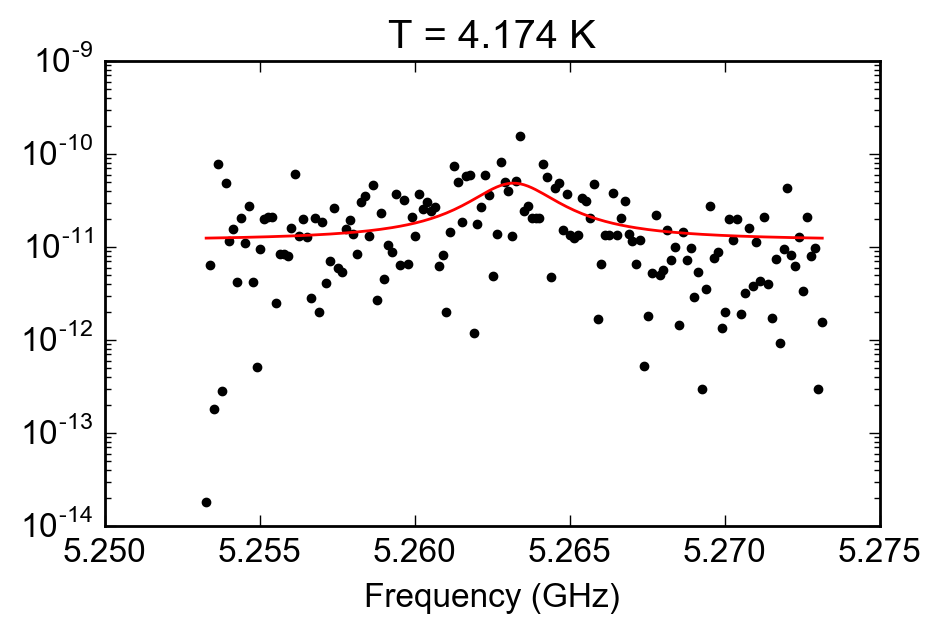

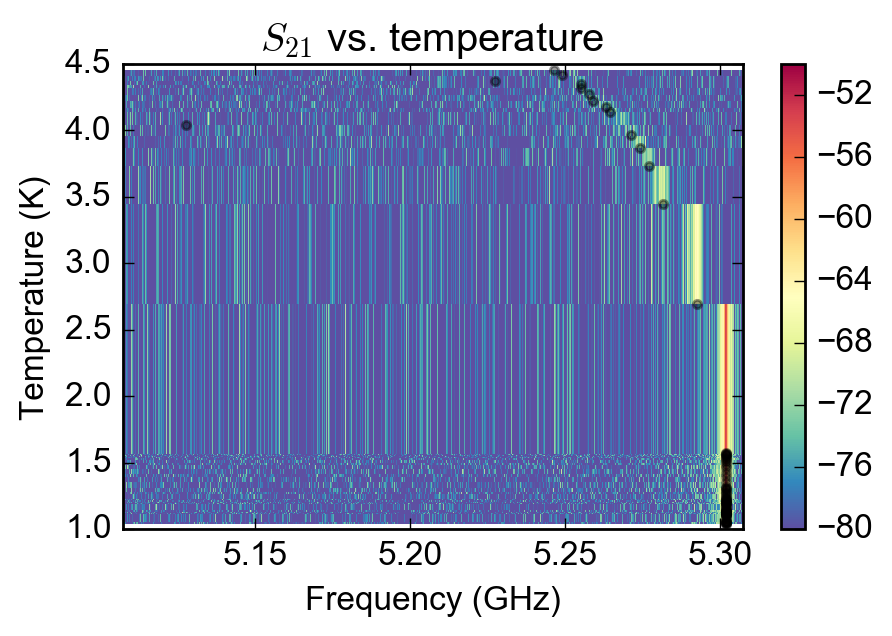

In [14]:
f0s = list()
Qs = list()

for k in range(np.shape(fpoints)[0]):
    fr, ferr = kfit.fit_lor(fpoints[k,:], common.dBm_to_W(mags[k,:]), no_offset=False, verbose=False)
    f0s.append(fr[-2])
    Qs.append(fr[-2]/(2*fr[-1]))
    
    if k == 63:
        plt.figure(figsize=(5.,3.))
        common.configure_axes(12)
        xdata, ydata = kfit.selectdomain(fpoints[k,:]/1E9, mags[k,:], (fr[2]/1E9 - 0.010, fr[2]/1E9 + 0.010))
        plt.plot(xdata, common.dBm_to_W(ydata), '.k')
        plt.plot(xdata, kfit.lorfunc(xdata*1E9, *fr), '-r')
        plt.yscale('log')
        plt.xlabel("Frequency (GHz)")
        plt.title("T = %.3f K"%(temps[k]))

f0s = np.array(f0s)
Qs = np.array(Qs)

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.pcolormesh(fpoints/1E9, temps, mags, cmap=plt.cm.Spectral_r, vmin=-80, vmax=-50)
plt.plot(f0s/1E9, temps, 'o', **common.plot_opt('k', msize=3))
plt.colorbar()
plt.xlabel("Frequency (GHz)")
plt.xlim(np.min(fpoints/1E9), np.max(fpoints/1e9))
plt.title("$S_{21}$ vs. temperature")
plt.ylabel("Temperature (K)")

if save: 
    common.save_figure(fig, save_path=os.path.split(datapath)[0])

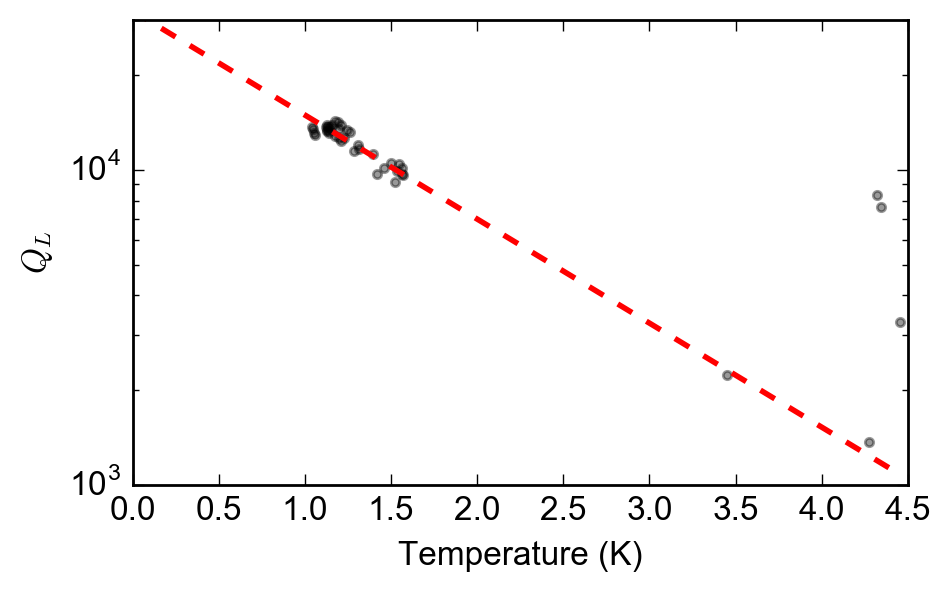

In [15]:
temps_plot = np.linspace(0, np.max(temperature))
Qi_guide = np.exp(-temps_plot/9.2 * 7.0) * 3.2e4

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(temperature[f0s > 5.235E9], Qs[f0s > 5.235E9], 'o', **common.plot_opt('k', msize=3))
plt.plot(temps_plot, Qi_guide, '--r', lw=2.0)
plt.ylim(1e3, 3e4)
plt.yscale('log')
plt.xlim(0, 4.5)
plt.ylabel("$Q_L$")
plt.xlabel("Temperature (K)")

if save: 
    common.save_figure(fig, save_path=os.path.split(datapath)[0])

===========================  ===================  ===================
Parameter                           Value                 Std
===========================  ===================  ===================
f0                            5.648586161298212   0.08156494811655447
Kinetic Inductance fraction  0.13484037230854168  0.0327644928104016
Tc                            7.167668163702081   0.3347569320174426
===========================  ===================  ===================


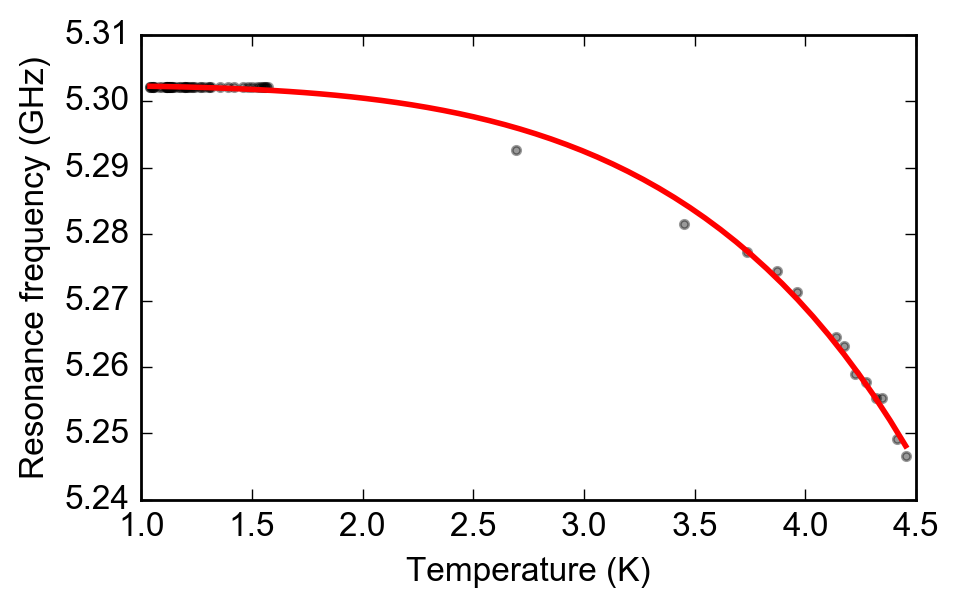

In [16]:
f0s_fit = f0s[f0s > 5.235E9]
temps_fit = temps[f0s > 5.235E9]
temps_plot = np.linspace(np.min(temps_fit), np.max(temps_fit))

sortedd = np.argsort(temps_fit)
temps_fit = temps_fit[sortedd]
f0s_fit = f0s_fit[sortedd]

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(temps_fit, f0s_fit/1E9, 'o', **common.plot_opt('k', msize=3))

f0_guess = 6.0
alpha_guess = 0.25
Tc_guess = 8.5

fr, ferr = kfit.fit_kinetic_fraction(temps_fit, f0s_fit/1E9, fitparams=[f0_guess, alpha_guess, Tc_guess], 
                                     showfit=False, parambounds=[[0.0, 0.0, 0.0], [np.inf, np.inf, np.inf]])

#plt.plot(temps_fit, kfit.kinfunc(temps_fit, *[f0_guess, alpha_guess, Tc_guess]))
plt.plot(temps_plot, kfit.kinfunc(temps_plot, *fr), '-r', lw=2.0)
plt.xlabel("Temperature (K)")
plt.ylabel("Resonance frequency (GHz)")

#plt.ylim(5.235,5.5)

if save: 
    common.save_figure(fig, save_path=os.path.split(datapath)[0])

/Users/gkoolstra/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


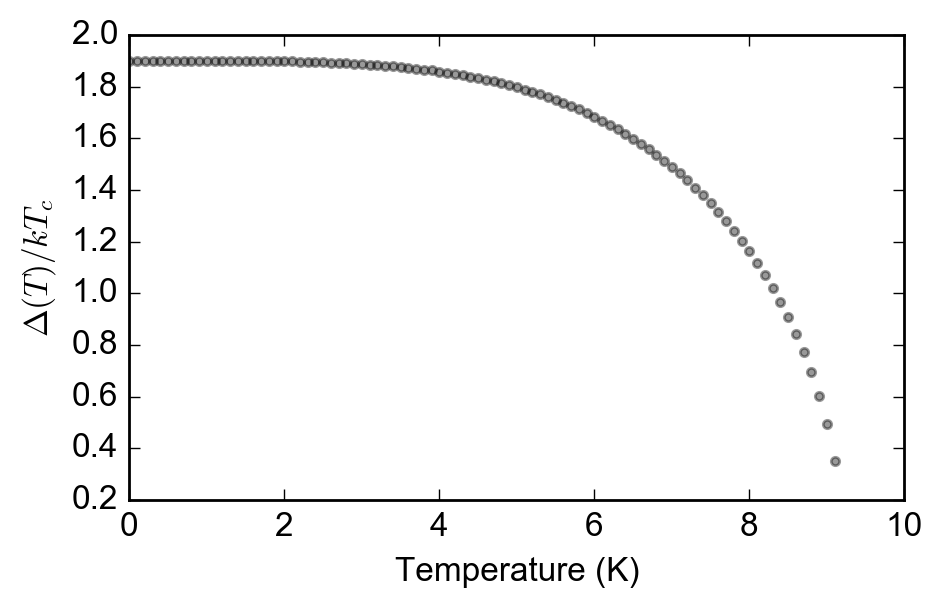

In [17]:
Tc = 9.2
Delta0 = 1.90
T = np.linspace(0, 10, 101)

Delta = Delta0 * np.sqrt(np.cos(np.pi/2. * (T/Tc)**2))

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(T, Delta, 'o', **common.plot_opt('k', msize=3))
plt.xlabel("Temperature (K)")
plt.ylabel("$\Delta (T)/kT_c$")